In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Kernels and Convolution

Kernels can be an arbitrary size of M x N pixels, provided that both M and N are odd integers. We use an odd kernel size to ensure there is a valid integer (x, y)-coordinate at the center of the image

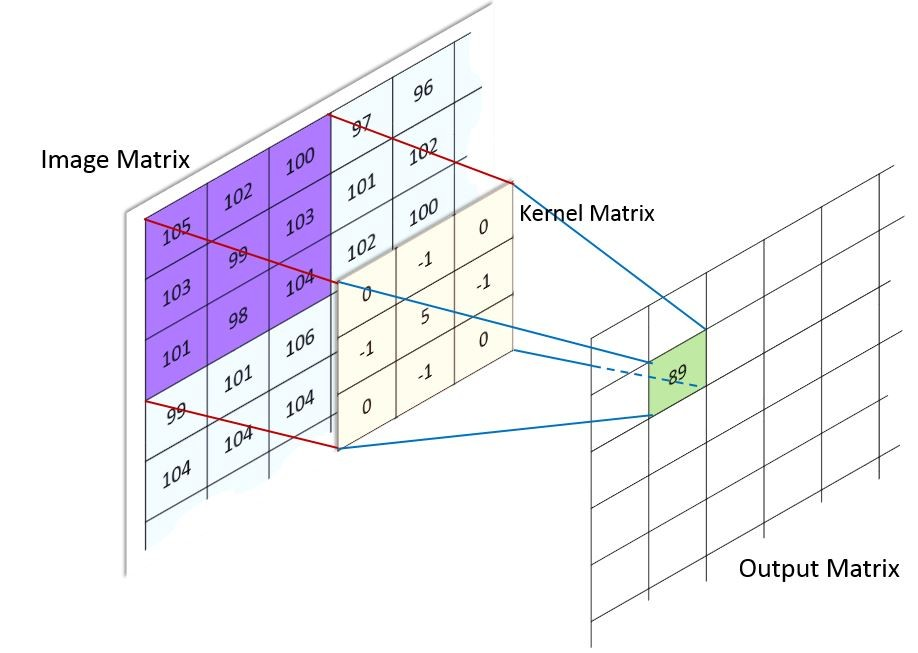

Convolution steps:

1. Select an (x, y)-coordinate from the original image.
2. Place the center of the kernel at this (x, y)-coordinate.
3. Take the element-wise multiplication of the input image region and the kernel, then sum up the values of these multiplication operations into a single value. The sum of these multiplications is called the **kernel output**.
4. Use the same (x, y)-coordinates from Step #1, but this time, store the kernel output in the same (x, y)-location as the output image.

### Image Filtering Using Convolution

In image processing, a convolution kernel is a 2D matrix that is used to filter images, also known as a convolution matrix. Convolution kernel is typically a square, MxN matrix, where both M and N are odd integers (e.g. 3×3, 5×5, 7×7 etc.)

The goal here is to use a low-pass filter to reduce the amount of noise and detail in an image.

By smoothing an image prior to applying techniques such as edge detection or thresholding we are able to reduce the amount of high-frequency content, such as noise and edges

**Average Blurring**

Average filter takes an area of pixels surrounding a central pixel, averages all these pixels together, and replaces the central pixel with the average.

By taking the average of the region surrounding a pixel, we are smoothing it and replacing it with the value of its local neighborhood. 

3x3 average kernel

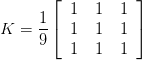

5x5 average kernel

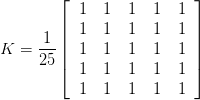

In [2]:
img = cv2.imread("./images/apple.jpg", cv2.IMREAD_UNCHANGED)

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
kernels = [(3, 3), (9, 9), (15, 15)]

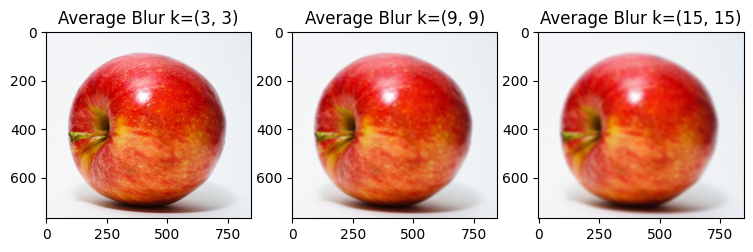

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for idx, kernel in enumerate(kernels):
    img_blur = cv2.blur(img, kernel)

    axes[idx].imshow(img_blur)
    axes[idx].set_title(f"Average Blur k={kernel}")

plt.show()

As the size of your kernel increases, your image will become progressively more blurred. This could easily lead to a point where you lose the edges of important structural objects in the image. 

**Gaussian blurring**

Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using weighted mean, where neighborhood pixels that are closer to the central pixel contribute more "weight" to the average.

Gaussian smoothing is used to remove noise that approximately follows a Gaussian distribution

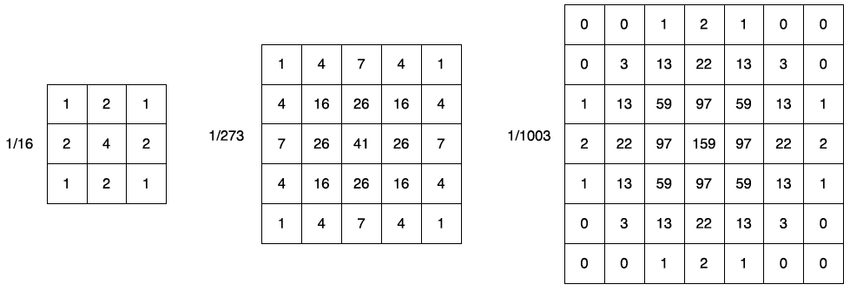

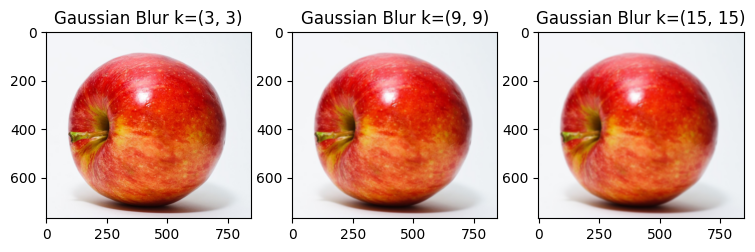

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for idx, kernel in enumerate(kernels):
    img_blur = cv2.GaussianBlur(img, kernel, 0)

    axes[idx].imshow(img_blur)
    axes[idx].set_title(f"Gaussian Blur k={kernel}")

plt.show()

**Median Blurring**

Instead of replacing the central pixel with the average of the neighborhood, we instead replace the central pixel with the median of the neighborhood.

The median blur method has been most effective when removing salt-and-pepper noise.

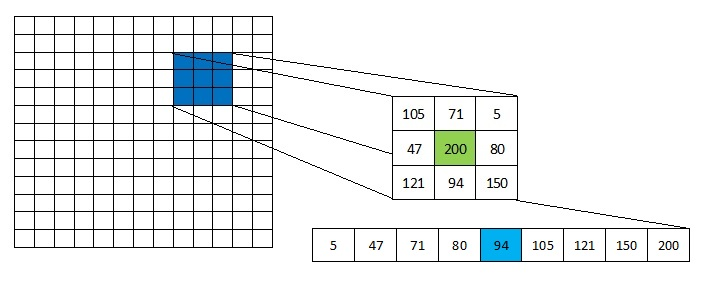

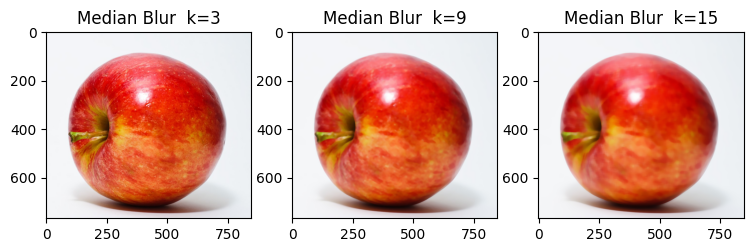

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

for idx, kernel in enumerate(kernels):
    img_blur = cv2.medianBlur(img, kernel[0])

    axes[idx].imshow(img_blur)
    axes[idx].set_title(f"Median Blur  k={kernel[0]}")

plt.show()

**Bilateral blurring**

To reduce noise while still maintaining edges, we can use bilateral blurring. Bilateral blurring accomplishes this by introducing 2 Gaussian distributions.

The first Gaussian function only considers spatial neighbors. That is, pixels that appear close together in the (x, y)-coordinate space of the image. 

The second Gaussian then models the pixel intensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

 If pixels in the same (small) neighborhood have a similar pixel value, then they likely represent the same object. But if two pixels in the same neighborhood have contrasting values, then we could be examining the edge or boundary of an object — and we would like to preserve this edge.

In [17]:
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

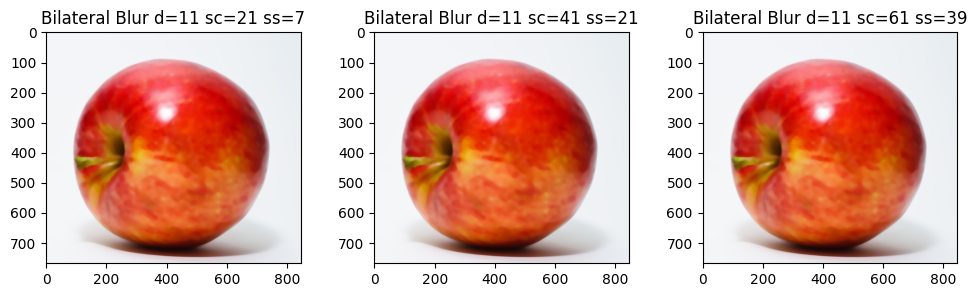

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for idx, (diameter, sigma_color, sigma_space) in enumerate(params):
    img_blur = cv2.medianBlur(img, kernel[0])

    axes[idx].imshow(img_blur)
    axes[idx].set_title(f"Bilateral Blur d={diameter} sc={sigma_color} ss={sigma_space}")

plt.show()

### Image Sharpening

Sharpening an image is the process of increasing the contrast between adjacent pixels to enhance the details in an image. 

This can be useful for a number of different image processing tasks, such as improving the clarity of an image, restoring details that have been lost due to blurring, or making an image appear more vivid and crisp.

In [50]:
kernel = np.array([
    [ 0, -1, 0],
    [-1,  5,-1],
    [ 0, -1, 0],
])

In [51]:
img_sharp = cv2.filter2D(img, -1, kernel)

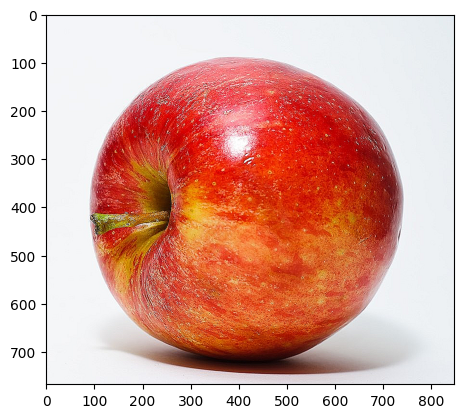

In [52]:
plt.imshow(img_sharp)
plt.show()

### Artistic Rendering

**Edge Preserving Filter**

In [53]:
img_filter = cv2.edgePreservingFilter(img, flags=1, sigma_s=60, sigma_r=0.4)

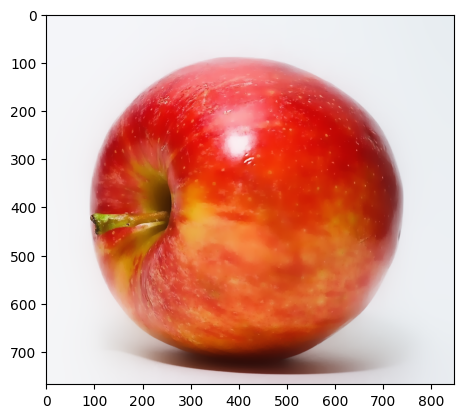

In [54]:
plt.imshow(img_filter)
plt.show()

**Detail Enhancing Filter**

In [55]:
img_filter = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)

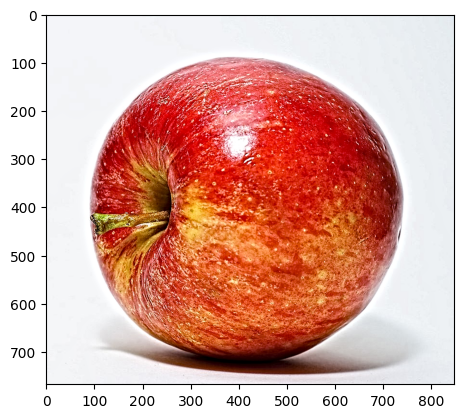

In [56]:
plt.imshow(img_filter)
plt.show()

**Pencil Sketch Filter**

In [57]:
img_filter_gray, img_filter_color = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.05)

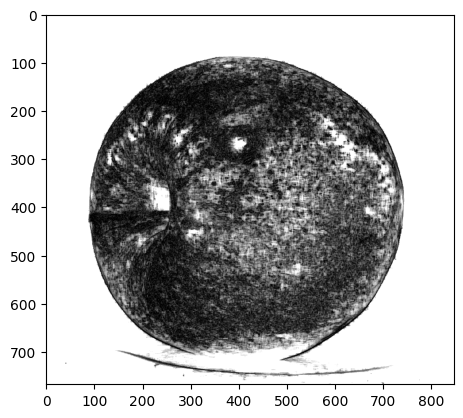

In [59]:
plt.imshow(img_filter_gray, cmap="gray")
plt.show()

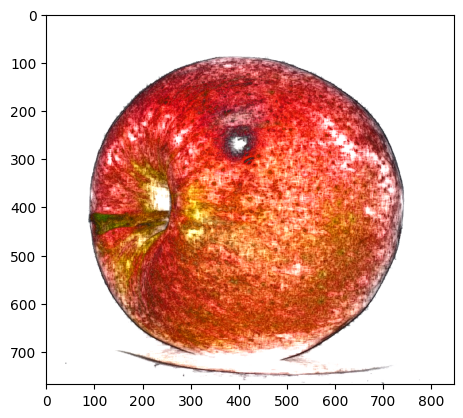

In [60]:
plt.imshow(img_filter_color)
plt.show()

**Stylization Filter**

In [61]:
img_filter = cv2.stylization(img, sigma_s=60, sigma_r=0.07)

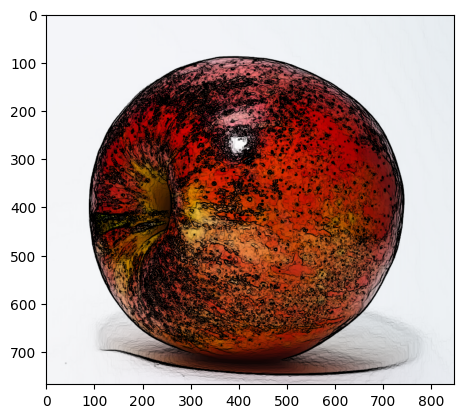

In [62]:
plt.imshow(img_filter)
plt.show()

### References

- https://pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
- https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
- https://learnopencv.com/image-filtering-using-convolution-in-opencv
- https://www.opencvhelp.org/tutorials/image-processing/how-to-sharpen-image/
- https://learnopencv.com/non-photorealistic-rendering-using-opencv-python-c/